In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
targets = np.genfromtxt('gaia-no-brewer-northern.csv', delimiter=',', names=True, dtype=None, encoding=None)

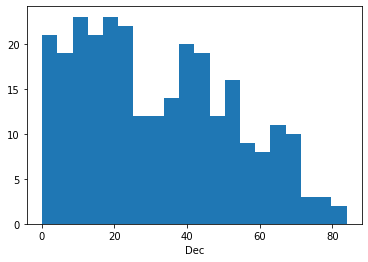

In [98]:
plt.hist(targets['DEJ2000'], bins=20)
plt.xlabel('Dec');

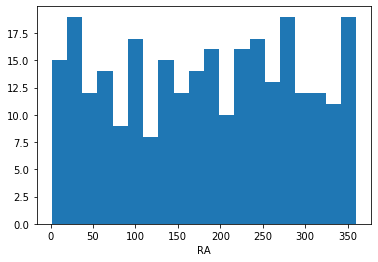

In [3]:
plt.hist(targets['RAJ2000'], bins=20)
plt.xlabel('RA');

Distribution is fairly even so I'm going to ignore semester constraints right now.

In [4]:
vmags = targets['Gmag'] + 0.5 # this is a hack but Annelies's detailed comparison validates it

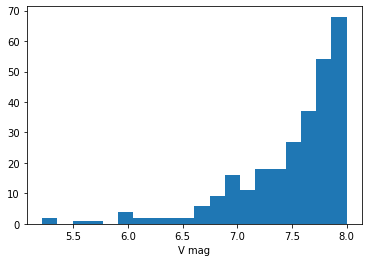

In [5]:
plt.hist(vmags, bins=20)
plt.xlabel('V mag');

Calculate a scaling factor on the exposure time.
We use the fact that the flux of a star with magnitude $V = 8$ compared to a star of magnitude $m_V$ is a factor of $10^{0.4(m_V - 8)}$ brighter:

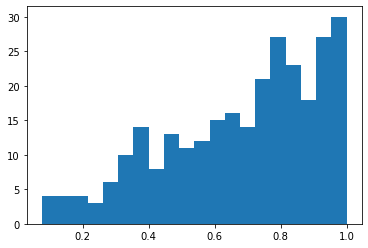

In [6]:
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20);

Because all the stars in our sample are brighter than $V = 8$ by construction, they will all require some fraction $<1$ of the time it would take to observe a star of exactly $V = 8$.

Plus the standard stars to be observed by all instruments (these are selected to be bright so they'll be quick):

In [7]:
standards = np.genfromtxt('gaia-brewer-overlap-standards.csv', delimiter=',', names=True, dtype=None, encoding=None)

In [8]:
flux_scaling_standards = 10.**(0.4 * (standards['Gmag'] + 0.5 - 8.0))

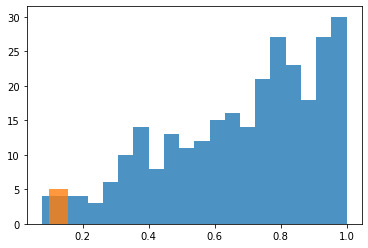

In [9]:
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20, alpha=0.8)
plt.hist(flux_scaling_standards, bins=2, alpha=0.8);

#### FIES time:

Select a randomized subset of 1/3rd of the target list:

In [49]:
np.random.shuffle(flux_scaling)
N = len(targets)
subset = flux_scaling[0:int(N/3)]

In [50]:
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards) # just one obs of each standard star

Calculate the required integration time:

In [51]:
v8_exptime = 30. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

Add on overheads for readout + slew:

In [52]:
readout_time = 90.
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [53]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 78.41 hours or 9.8 8-hour nights


#### HARPS-N time:

In [54]:
subset = flux_scaling[int(N/3):2*int(N/3)]
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards)

In [55]:
v8_exptime = 15. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [56]:
readout_time = 150.
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [57]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 46.11 hours or 5.8 8-hour nights


#### HERMES time:

(Note that due to rounding in the 1/3rd sample, HERMES might get 1-2 more targets than the other spectrographs)

In [58]:
subset = flux_scaling[2*int(N/3):]
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards)

In [59]:
v8_exptime = 25. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [60]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [61]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 67.25 hours or 8.4 8-hour nights


We should *round up* on HERMES time because it needs middle-of-night calibrations (advised by instrument team).

##### Note: you can double-check the stability of the calculations by re-running all cells from the "FIES time" section down. This will shuffle the targets to different instruments.
The conclusions remain quite stable to within an hour or two.

#### HIRES:

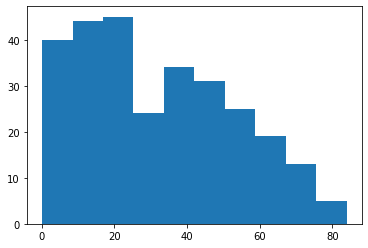

In [71]:
plt.hist(targets['DEJ2000']);

In [93]:
#subset = np.copy(flux_scaling) # all the stars
subset = flux_scaling[(targets['DEJ2000'] >= 15.) & (targets['DEJ2000'] <= 60.)]

In [94]:
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards)

In [95]:
v8_exptime = 10. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8 - CHECK THIS
total_exptime = np.sum(v8_exptime * subset)

In [96]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [97]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 64.42 hours or 8.1 8-hour nights


can this be done in full-night increments?

#### southern stars:

In [99]:
targets_s = np.genfromtxt('gaia-no-brewer.csv', delimiter=',', names=True, dtype=None, encoding=None)
targets_s = targets_s[targets_s['DEJ2000'] < 0.]

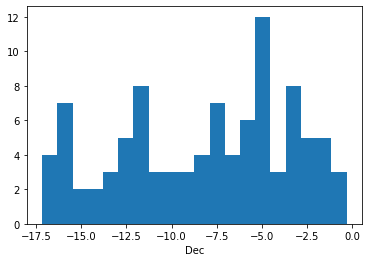

In [100]:
plt.hist(targets_s['DEJ2000'], bins=20)
plt.xlabel('Dec');

In [112]:
eso = np.genfromtxt('gaia-no-brewer-southern-eso.csv', delimiter=',', dtype=None, encoding=None, skip_header=1, skip_footer=207, names=True)

In [120]:
already_observed_mask = np.isin(targets_s['DR2Name'], eso['Uploaded_file_input_value'])
print('{0} of the {1} targets below 0 declination have been observed by HARPS or UVES'.format(sum(already_observed_mask), len(targets_s)))

40 of the 97 targets below 0 declination have been observed by HARPS or UVES


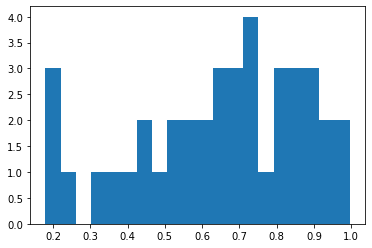

In [121]:
targets = targets_s[already_observed_mask]
vmags = targets['Gmag'] + 0.5 # this is a hack but Annelies's detailed comparison validates it
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20);

In [ ]:
subset = np.append(flux_scaling, flux_scaling) # two observations per star

In [125]:
v8_exptime = 15. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [126]:
readout_time = 150.
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [127]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 83.51 hours or 10.4 8-hour nights
